### 1. Introduction of dataset
#### Telco Customer Churn: Focused customer retention programs
##### The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

#### *Context
##### "Predict behavior to retain customers. Our goal is to analyze all relevant customer data and develop focused customer retention programs."

#### *Content: The data set includes information about:

##### Customers who left within the last month – the column is called Churn
##### Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
##### Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
##### Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# import required libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# let's see that dataset
customer_churn=pd.read_csv("Telco-Customer-Churn.csv")
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# check size of dataset
customer_churn.shape

(7043, 21)

In [5]:
# check any missing values in the dataset
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No missing values in the dataset

In [6]:
# checking what type of data we have
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Here we have lot of object dtypes

### 2. Perform EDA on the dataset

In [13]:
# Now let's go through the churn column in our dataset
customer_churn['Churn'][:5]

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

#### Here we can say that churn have have positive or negative values . Yes means customer will churn our and no means customer will not churn our. So, our first task is to convert the yes/no values to 1/0 values so that is will be easier for us to do the further operations.

In [33]:
customer_churn['Churn']=customer_churn['Churn'].replace({'Yes':1 , 'No':0})

#### Here we get the value in the form of 0 and 1. Let's step ahead and look at other rows if we can convert the values to the appropriate format.

In [15]:
customer_churn['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [12]:
customer_churn['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### let's convert replace the "No internet service" string to "No" in the following columns below.

In [16]:
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']

for value in cols:
    customer_churn[value]=customer_churn[value].replace({'No internet service':'No'})

#### Now the values lies in yes or no for the above columns.

In [26]:
empty=[i for i in customer_churn['TotalCharges'] if i == " "]
empty


[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

#### Total charges column have some values with extra spaces. so first remove those extra spaces from our columns. After that our column is a type of object so convert it into float.

In [27]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ",np.nan)

# Drop null values of 'Total Charges' feature
customer_churn = customer_churn[customer_churn["TotalCharges"].notnull()]
customer_churn = customer_churn.reset_index()[customer_churn.columns]

customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [28]:
customer_churn['TotalCharges'].dtype

dtype('float64')

#### Here we successfully converted our object type data into float.

### Data Visualization: Let's visualize our data and understand it more clearly.

In [34]:
customer_churn['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

#### What percentage of customer have churn or not ?

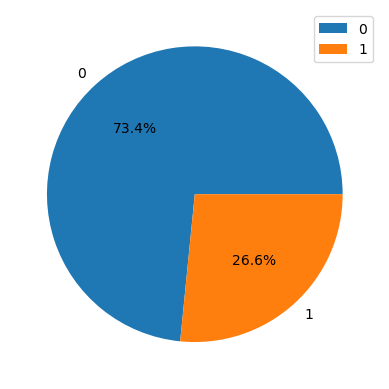

In [55]:
churn_x = customer_churn['Churn'].value_counts()
churn_y = customer_churn['Churn'].value_counts().keys().tolist()
fig = plt.pie(churn_x, 
             labels =churn_y, autopct= '%1.1f%%')
plt.legend()
plt.show()

#### As per the grapgh 73.45% of customers wil churn. 

#### "Male or Female" who have churn the most?

In [69]:
gender_chunk = customer_churn.groupby('gender').Churn.mean().reset_index()

In [70]:
gender_chunk

,gender,Churn
0,Female,0.269595
1,Male,0.262046


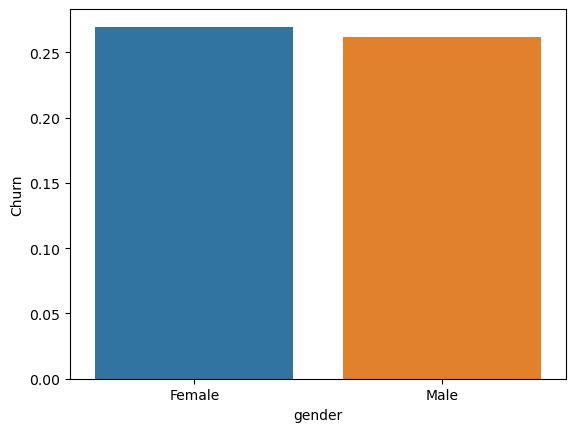

In [75]:
sns.barplot(x=gender_chunk['gender'], y=gender_chunk['Churn'])
plt.show()

#### Does Tech support plays a important role?

In [76]:
tech_chunk = customer_churn.groupby('TechSupport').Churn.mean().reset_index()

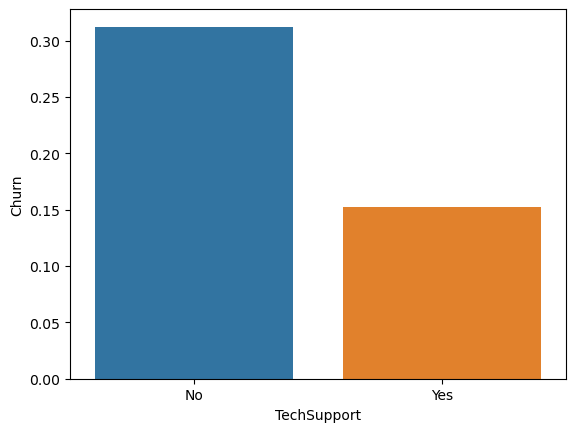

In [78]:
sns.barplot(x=tech_chunk['TechSupport'], y=tech_chunk['Churn'])
plt.show()

#### Telecome company is not satisfying their customer with internet support?

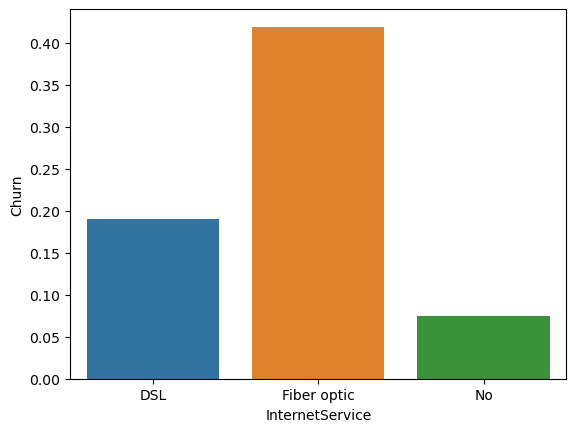

In [79]:
internet_chunk = customer_churn.groupby('InternetService').Churn.mean().reset_index()

sns.barplot(x=internet_chunk['InternetService'], y=internet_chunk['Churn'])
plt.show()

#### Payment Method, Any role in Churning??

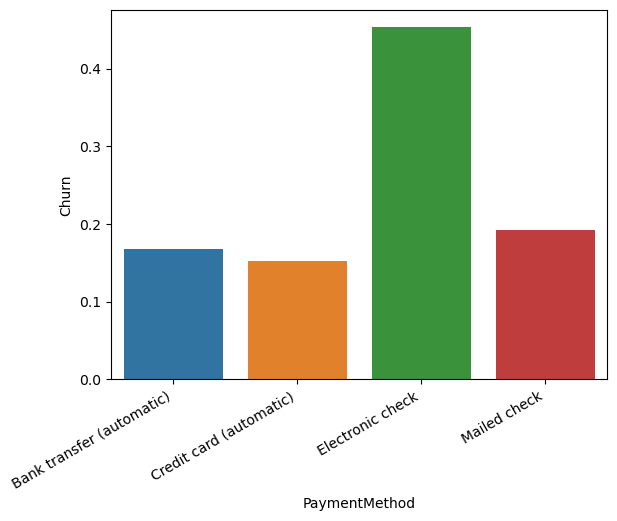

In [89]:
payment_chunk= customer_churn.groupby('PaymentMethod').Churn.mean().reset_index()
plt.Figure(figsize=(12,8))
sns.barplot(x=payment_chunk['PaymentMethod'], y=payment_chunk['Churn'] )
plt.xticks(rotation = 30, ha = 'right')
plt.show()

#### Here we can clearly see that customers making payment through electronic check seem to be more churn than others.

#### Signing long term or short contract term churn the most?

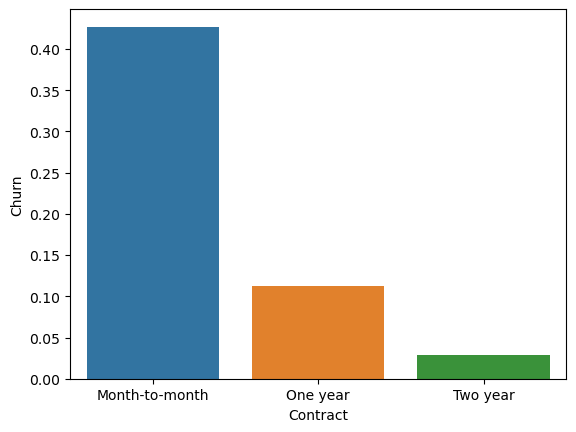

In [90]:
contract_chunk= customer_churn.groupby('Contract').Churn.mean().reset_index()

sns.barplot(x=contract_chunk['Contract'], y=contract_chunk['Churn'])
plt.show()

#### From the above bar chart we can clearly see that customers who have monthly contract seems more likely to churn as compared to one year of two year contract signed customers.

#### is tenure has effect on Churn ?

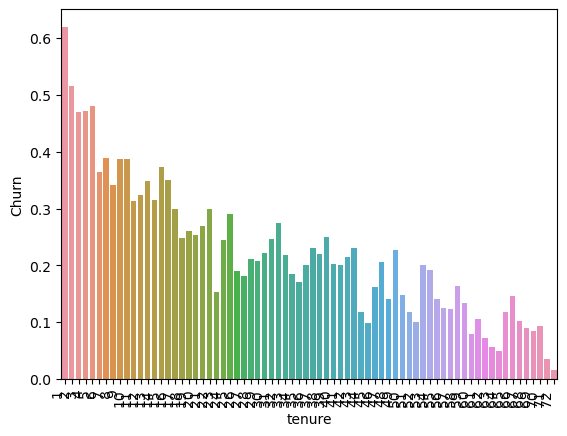

In [99]:
ten_chunk= customer_churn.groupby('tenure').Churn.mean().reset_index()
plt.Figure().set_figwidth(15)
sns.barplot(x=ten_chunk['tenure'], y=ten_chunk['Churn'], width=.8 )
plt.xticks(rotation = 90, ha = 'right')
plt.show()

#### Here we can see that higher tenure resulted in low churn rate.

In [100]:
churn_data = pd.get_dummies(customer_churn, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True)

In [101]:
churn_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


## Modelling

In [102]:
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
standard = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Apply the feature scaling operation on dataset using fit_transform() method
churn_data[columns_for_ft_scaling] = standard.fit_transform(churn_data[columns_for_ft_scaling])

In [103]:
churn_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


#### Here we can see that tenure,MonthlyCharges and TotalCharges are in same range. and the suffix are converted into subcolumns eg: Contract is expanded to contract_one year and Contract_Two year. These are only the individual values. Let's see how many columns we have in our dataset.

In [104]:
list(churn_data.columns)

['customerID',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'Contract_One year',
 'Contract_Two year',
 'Dependents_Yes',
 'DeviceProtection_Yes',
 'gender_Male',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_Yes',
 'OnlineSecurity_Yes',
 'PaperlessBilling_Yes',
 'Partner_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'PhoneService_Yes',
 'SeniorCitizen_1',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'TechSupport_Yes']

#### We can clearly see that we have added multiple columns for the individual values.

#### Now let's import the appropriate libraries and train our model.

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [107]:
#split the data to X and y
X = churn_data.drop(['Churn','customerID'], axis=1)
y = churn_data['Churn']

In [108]:
#Using the train_test_split() function to split our data into training and test sets. I will use 70% of our data for training our model and 30% for testing our model.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [109]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4922, 24), (4922,), (2110, 24), (2110,))

#### We have successfully splited our data into 70% and 30%. Now its time to predict using different algorithms.

### 1. Logistic Regression

In [110]:
log=LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [111]:
y_pred = log.predict(X_test)

In [114]:
print(f'Accuracy of Logistic Regression {accuracy_score(y_pred, y_test)*100}%')

Accuracy of Logistic Regression 80.0%


### 2. Random Forest

In [115]:
#using random forest classifier
rand = RandomForestClassifier()

#fitting the data
rand.fit(X_train,y_train)

#predicting values
y_rand_pred = rand.predict(X_test)

In [116]:
print("The accuracy score of Random Forest is: {:.2f}% ".format(accuracy_score(y_rand_pred,y_test)*100))

The accuracy score of Random Forest is: 78.34% 


### 3. Support Vector Machine

In [117]:
#using support vector machine
svm_model = SVC(kernel='linear',probability=True)

#fitting our data
svm_model.fit(X_train,y_train)

#predicting values
y_svm_pred = svm_model.predict(X_test)
#svm_model.score(X_test,y_test)

In [118]:
print("The accuracy score of Support Vector Machine is: {:.2f}% ".format(accuracy_score(y_svm_pred,y_test)*100))

The accuracy score of Support Vector Machine is: 80.33% 


### 4. Decision Tree

In [119]:
#using decision tree classifier
dec = DecisionTreeClassifier()

#fitting our data
dec.fit(X_train,y_train)

#predicting the values
y_dec_pred = dec.predict(X_test)

In [120]:
print("The accuracy score of Decision Tree is: {:.2f}% ".format(accuracy_score(y_dec_pred,y_test)*100))

The accuracy score of Decision Tree is: 71.09% 


### 5. K-Nearest Neighbor

In [122]:
#using knearestneighbor
knn = KNeighborsClassifier()

#fitting our data
knn.fit(X_train,y_train)

#predicting the values.
y_knn_pred = knn.predict(X_test)

In [123]:
print("The accuracy score of K-Nearest Neighbor is: {:.2f}% ".format(accuracy_score(y_knn_pred,y_test)*100))

The accuracy score of K-Nearest Neighbor is: 76.21% 


#### Based on above alogothims, here we can see that logistic regression and Support vector machine performs better as compared to other.

## Confusion Matrix: 
#### So lets plot the confucion matrix for each of our model to see how well they perform. 

Logistic Regression Model


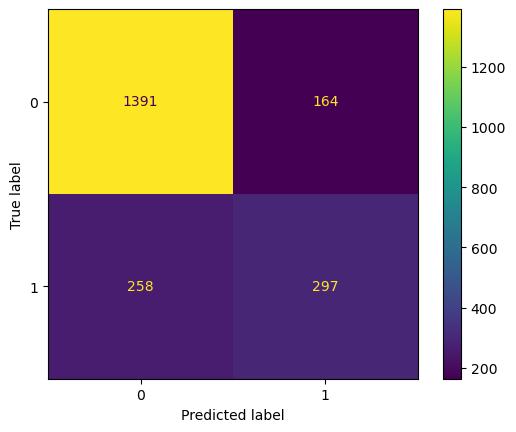

In [127]:
print('Logistic Regression Model')
cm_log=confusion_matrix(y_test, y_pred)
dis_log=ConfusionMatrixDisplay(confusion_matrix=cm_log)
dis_log.plot()

Random Forest Model


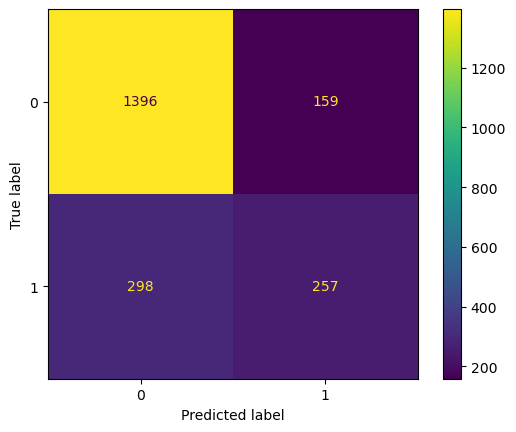

In [129]:
print('Random Forest Model')
cm_rand=confusion_matrix(y_test, y_rand_pred)
dis_rand=ConfusionMatrixDisplay(confusion_matrix=cm_rand)
dis_rand.plot()

Support Vector Machine Model


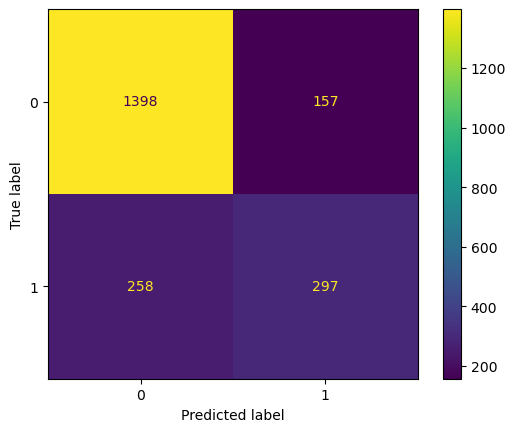

In [130]:
print('Support Vector Machine Model')
cm_svm=confusion_matrix(y_test, y_svm_pred)
dis_svm=ConfusionMatrixDisplay(confusion_matrix=cm_svm)
dis_svm.plot()

Decision Tree Model


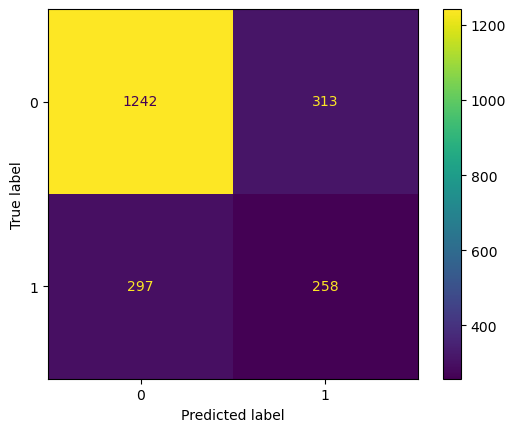

In [131]:
print('Decision Tree Model')
cm_dec=confusion_matrix(y_test, y_dec_pred)
dis_dec=ConfusionMatrixDisplay(confusion_matrix=cm_dec)
dis_dec.plot()

KNN Model


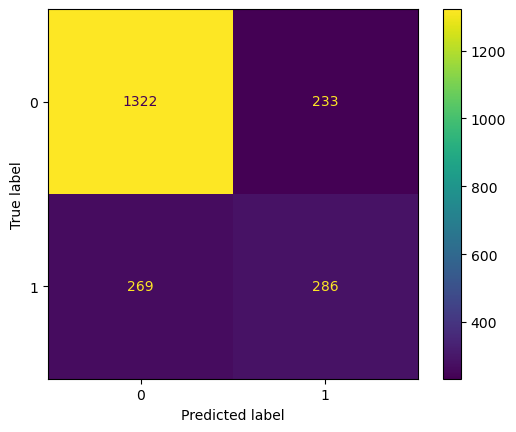

In [132]:
print('KNN Model')
cm_knn=confusion_matrix(y_test, y_knn_pred)
dis_knn=ConfusionMatrixDisplay(confusion_matrix=cm_knn)
dis_knn.plot()

### Let's predict the probability of churn for each customer using logistic regression model.

In [133]:
# Predict the probability of Churn of each customer
churn_data['Customer Churning Probability'] = log.predict_proba(churn_data[X_test.columns])[:,1]

#### Here I have created a new column in our dataset named Customer Churning Probability.

In [134]:
churn_data[['customerID','Customer Churning Probability']].head(10)

,customerID,Customer Churning Probability
0,7590-VHVEG,0.637171
1,5575-GNVDE,0.045044
2,3668-QPYBK,0.295285
3,7795-CFOCW,0.032217
4,9237-HQITU,0.690221
5,9305-CDSKC,0.802503
6,1452-KIOVK,0.398117
7,6713-OKOMC,0.284159
8,7892-POOKP,0.635197
9,6388-TABGU,0.008962


#### Here, we can clearly see the probability of customer whether they churn or not.